In [1]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

In [2]:
df = pd.read_csv('./data/imbd_keywords.csv')

In [3]:
df.head()

,review,sentiment,keywords
0,One of the other reviewers has mentioned that ...,positive,"['other shows', 'graphic violence', 'prison ex..."
1,A wonderful little production. The filming tec...,positive,"['halliwell', 'michael sheen', 'realism', 'com..."
2,I thought this was a wonderful way to spend ti...,positive,"['spirited young woman', 'devil wears prada', ..."
3,Basically there's a family where a little boy ...,negative,"['playing parents', 'jake', 'parents', 'descen..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"['mr. mattei', 'good luck', 'mattei', 'human r..."


In [4]:
df.shape

(40436, 3)

In [5]:
from ast import literal_eval

In [6]:
df['keywords'] = df['keywords'].apply(literal_eval)

In [8]:
df.head()

,review,sentiment,keywords
0,One of the other reviewers has mentioned that ...,positive,"[other shows, graphic violence, prison experie..."
1,A wonderful little production. The filming tec...,positive,"[halliwell, michael sheen, realism, comedy, wi..."
2,I thought this was a wonderful way to spend ti...,positive,"[spirited young woman, devil wears prada, summ..."
3,Basically there's a family where a little boy ...,negative,"[playing parents, jake, parents, descent dialo..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[mr. mattei, good luck, mattei, human relation..."


In [15]:
stop_words=[
    'movie',
    'review',
    'film',
    'actor',
    'actress',
    'films',
    'reviews',
    'actors',
    'actresses'
]

import spacy
nlp = spacy.load('en_core_web_lg')

In [16]:
stops = nlp.Defaults.stop_words.union(stop_words)

In [10]:
df['keywords'][0]

['other shows',
 'graphic violence',
 'prison experience',
 'prison bitches',
 'violence',
 'emerald city',
 'dodgy dealings',
 'glass fronts',
 'inmates',
 'street skills',
 'unflinching scenes',
 'crooked guards',
 'the oswald maximum security state penitentary',
 'mainstream audiences',
 'oz',
 'city',
 'shady agreements',
 'pretty pictures',
 'touch',
 'muslims',
 'irish',
 'italians',
 'gangstas',
 'latinos',
 'christians',
 'home',
 'first',
 'charm',
 'the high levels',
 'drugs',
 'right',
 'regards',
 'well mannered, middle class inmates',
 'sex',
 'a show',
 'scuffles',
 'order',
 'aryans',
 'just 1 oz episode',
 'the first episode',
 'the other reviewers',
 'your darker side',
 'the prison',
 'the main appeal',
 'romance',
 'the first thing',
 'an experimental section',
 'privacy',
 'the classic use',
 'the word',
 'no punches',
 'its brutality',
 'their lack',
 'a taste',
 'the fact',
 'the nickname',
 'the agenda',
 'all the cells',
 'a nickel',
 'you']

In [26]:
def remove_stops(_list_):
    
    keywords = []
    
    for keyword in _list_:
        
        phrase = []
        
        words = keyword.split()
        
        for word in words:
            if word in stops:
                pass
            else:
                phrase.append(word)
        
        phrase = ' '.join(phrase)
        
        if len(phrase) >0:
            keywords.append(phrase)
    
    return keywords

In [29]:
from tqdm import tqdm

tqdm.pandas()

df['clean_keywords'] = df['keywords'].progress_apply(remove_stops)

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 40436/40436 [00:02<00:00, 19351.91it/s]


In [32]:
df['clean_keywords'][765]

['orca whales',
 'nolan',
 'clear nolan',
 'total psychos',
 'total psychos',
 'poor poor whale',
 'whale',
 'killer whale',
 'whale',
 'final journey',
 'melvilles eerie man-whale connection',
 'unborn child',
 'ineffectual method',
 'compassion',
 'earth',
 'whales pain',
 'whale-character',
 'whale-hugger',
 'humans',
 'half-thought anti-human message',
 'way',
 'animals',
 'evil men',
 'revenge',
 'melville',
 'growth',
 'half',
 'hideous self-inflicted wounds',
 'message',
 'people',
 'canonical villain',
 'final scene',
 'pregnant cow',
 'unborn fetus',
 'bits',
 'message',
 'squeal',
 'sick psycho-bitch',
 'bizarre journey',
 'good snap',
 'no-doubt',
 'goal',
 'word',
 'respect',
 'mate',
 'talks',
 'grief',
 'motives',
 'focus',
 'wife',
 'cow',
 'truly interesting conclusion',
 'piece',
 'ice',
 'moment',
 'propellers',
 'fin',
 'bad thing',
 'oversight',
 'senses',
 'ends',
 'sea-monster',
 'north',
 'head',
 'victim',
 'mind',
 'water',
 'heart',
 'loss',
 'fisherman',
 'hu

In [55]:
import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
# Dict representation of all our keywords
id2word = corpora.Dictionary(df['clean_keywords'])

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
id2word.token2id['sea-monster']

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


18931

In [58]:
type(id2word)

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gensim.corpora.dictionary.Dictionary

In [38]:
len(id2word.keys())

490200

In [61]:
id2word.filter_extremes(no_below=5, no_above=0.85)

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
len(id2word.keys())

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


29708

In [63]:
corpus = [id2word.doc2bow(text) for text in df['clean_keywords']]

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
corpus[812]

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(76, 1),
 (584, 1),
 (673, 1),
 (807, 1),
 (1189, 1),
 (2224, 1),
 (3756, 1),
 (3964, 1),
 (5208, 1),
 (5550, 1),
 (8415, 1)]

In [43]:
id2word[77]

'wonderful way'

In [65]:
lda = LdaMulticore(corpus=corpus,
                  id2word=id2word,
                  num_topics=20,
                  passes=50,
                  workers=12)

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
lda.print_topics()

[(41,
  '0.015*"time" + 0.009*"things" + 0.009*"end" + 0.009*"people" + 0.008*"plot" + 0.008*"gore" + 0.007*"lot" + 0.007*"way" + 0.006*"story" + 0.006*"killer"'),
 (11,
  '0.010*"songs" + 0.009*"way" + 0.008*"story" + 0.007*"spanish" + 0.005*"kelly" + 0.005*"love" + 0.005*"scene" + 0.005*"woman" + 0.005*"lot" + 0.004*"time"'),
 (33,
  '0.011*"people" + 0.008*"time" + 0.007*"story" + 0.006*"earth" + 0.005*"way" + 0.005*"fact" + 0.005*"life" + 0.005*"thing" + 0.005*"place" + 0.004*"star trek"'),
 (30,
  '0.009*"people" + 0.007*"movies" + 0.007*"story" + 0.007*"humor" + 0.007*"time" + 0.007*"characters" + 0.006*"thing" + 0.006*"way" + 0.006*"life" + 0.006*"worst movies"'),
 (29,
  '0.011*"story" + 0.007*"characters" + 0.007*"washington" + 0.007*"people" + 0.007*"man" + 0.006*"time" + 0.005*"life" + 0.005*"plot" + 0.005*"fact" + 0.005*"action"'),
 (14,
  '0.019*"time" + 0.012*"people" + 0.011*"end" + 0.010*"money" + 0.010*"thing" + 0.010*"fact" + 0.008*"way" + 0.008*"second" + 0.007*"plot

In [66]:
import re

words = [re.findall(r'"[^"]*"', t[1]) for t in lda.print_topics(50)]

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
topics = [', '.join(t[0:5]) for t in words]

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
for id, t in enumerate(topics):
    print(f"----- Topic {id} -----")
    print(t, end="\n\n")

----- Topic 0 -----
"story", "characters", "acting", "time", "lot"

----- Topic 1 -----
"time", "fact", "way", "end", "role"

----- Topic 2 -----
"people", "time", "acting", "way", "thing"

----- Topic 3 -----
"story", "plot", "time", "fact", "director"

----- Topic 4 -----
"plot", "people", "acting", "time", "movies"

----- Topic 5 -----
"people", "time", "way", "fact", "thing"

----- Topic 6 -----
"people", "hollywood", "time", "fact", "story"

----- Topic 7 -----
"story", "plot", "acting", "action", "time"

----- Topic 8 -----
"life", "story", "time", "people", "characters"

----- Topic 9 -----
"time", "people", "plot", "game", "thing"

----- Topic 10 -----
"people", "time", "way", "story", "kids"

----- Topic 11 -----
"episode", "series", "season", "episodes", "characters"

----- Topic 12 -----
"time", "story", "people", "end", "lot"

----- Topic 13 -----
"story", "love", "life", "indian", "characters"

----- Topic 14 -----
"horror", "gore", "story", "killer", "time"

----- Topic 1

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.146910 -0.068784       1        1  10.377766
19     0.097703 -0.092057       2        1   8.747926
2     -0.108501 -0.021137       3        1   7.741191
12    -0.019363 -0.051642       4        1   6.499527
18     0.039072  0.033223       5        1   5.955619
5     -0.061321 -0.035586       6        1   5.742452
10     0.024548  0.050440       7        1   5.359499
4     -0.121094  0.034442       8        1   5.182849
0     -0.042811  0.058568       9        1   4.963801
16    -0.096720 -0.032696      10        1   4.272546
1      0.016947  0.016080      11        1   4.221100
11    -0.052693  0.115363      12        1   4.142715
13     0.089095  0.020997      13        1   4.021407
3      0.029453 -0.071455      14        1   3.745475
15     0.080694  0.183824      15        1   3.638955
7      0.028595 -0.011743      16        1   3.542238
14    -0.108208 -0.061990      17        1   3.236962
6      0.091800 -0.025807      18        1   2.993941
17    -0.044951 -0.040167      19        1   2.890363
9      0.010845  0.000125      20        1   2.723667, topic_info=         Term         Freq        Total Category  logprob  loglift
93     acting  4274.000000  4274.000000  Default  30.0000  30.0000
10    episode  1015.000000  1015.000000  Default  29.0000  29.0000
71       plot  4988.000000  4988.000000  Default  28.0000  28.0000
1392     gore  1120.000000  1120.000000  Default  27.0000  27.0000
205    horror  1367.000000  1367.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
679     place    65.685866  2533.473327  Topic20  -6.0695  -0.0493
45       life    68.503230  4829.123008  Topic20  -6.0275  -0.6523
154     today    61.001222  1583.742077  Topic20  -6.1435   0.3465
844       guy    59.703220  1840.565518  Topic20  -6.1650   0.1747
436      role    59.704543  2152.745259  Topic20  -6.1650   0.0181

[1791 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
22990      4  0.048175  "actors
22990      8  0.818974  "actors
22990     10  0.048175  "actors
22990     18  0.048175  "actors
22347     10  0.896291   "jokes
...      ...       ...      ...
3927      13  0.003731  zombies
3927      17  0.063421  zombies
3927      20  0.014922  zombies
12805     14  0.074270       zu
12805     19  0.891236       zu

[6692 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 20, 3, 13, 19, 6, 11, 5, 1, 17, 2, 12, 14, 4, 16, 8, 15, 7, 18, 10])

In [73]:
distro = [lda[doc] for doc in corpus]

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
distro[0]

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(6, 0.3043901), (10, 0.11567331), (11, 0.35957238), (19, 0.20031337)]

In [76]:
def update(doc):
    d_dist = {k:0 for k in range (0,20)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(doc) for doc in distro]

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
topics2 = pd.DataFrame.from_records(new_distro)
topics2.columns = topics

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
topics2.head()

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"""story"", ""characters"", ""acting"", ""time"", ""lot""","""time"", ""fact"", ""way"", ""end"", ""role""","""people"", ""time"", ""acting"", ""way"", ""thing""","""story"", ""plot"", ""time"", ""fact"", ""director""","""plot"", ""people"", ""acting"", ""time"", ""movies""","""people"", ""time"", ""way"", ""fact"", ""thing""","""people"", ""hollywood"", ""time"", ""fact"", ""story""","""story"", ""plot"", ""acting"", ""action"", ""time""","""life"", ""story"", ""time"", ""people"", ""characters""","""time"", ""people"", ""plot"", ""game"", ""thing""","""people"", ""time"", ""way"", ""story"", ""kids""","""episode"", ""series"", ""season"", ""episodes"", ""characters""","""time"", ""story"", ""people"", ""end"", ""lot""","""story"", ""love"", ""life"", ""indian"", ""characters""","""horror"", ""gore"", ""story"", ""killer"", ""time""","""way"", ""comedy"", ""british"", ""american"", ""time""","""plot"", ""time"", ""acting"", ""characters"", ""movies""","""story"", ""plot"", ""time"", ""end"", ""way""","""time"", ""life"", ""story"", ""people"", ""family""","""people"", ""way"", ""time"", ""french"", ""story"""
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.30439,0.0,0.000000,0.0,0.115673,0.359572,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.200313
1,0.310736,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.364155,0.0,0.000000,0.226414,0.000000,0.0,0.0,0.0,0.0,0.060492,0.000000,0.000000
2,0.525315,0.435489,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.316533,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.209441,0.0,0.0,0.0,0.0,0.000000,0.408593,0.000000
4,0.000000,0.000000,0.000000,0.0,0.650082,0.0,0.00000,0.0,0.324832,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [80]:
df['primary_topic'] = topics2.idxmax(axis=1)

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
df.head()

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review,sentiment,keywords,clean_keywords,primary_topic
0,One of the other reviewers has mentioned that ...,positive,"[other shows, graphic violence, prison experie...","[shows, graphic violence, prison experience, p...","""episode"", ""series"", ""season"", ""episodes"", ""ch..."
1,A wonderful little production. The filming tec...,positive,"[halliwell, michael sheen, realism, comedy, wi...","[halliwell, michael sheen, realism, comedy, wi...","""life"", ""story"", ""time"", ""people"", ""characters"""
2,I thought this was a wonderful way to spend ti...,positive,"[spirited young woman, devil wears prada, summ...","[spirited young woman, devil wears prada, summ...","""story"", ""characters"", ""acting"", ""time"", ""lot"""
3,Basically there's a family where a little boy ...,negative,"[playing parents, jake, parents, descent dialo...","[playing parents, jake, parents, descent dialo...","""time"", ""life"", ""story"", ""people"", ""family"""
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[mr. mattei, good luck, mattei, human relation...","[mr. mattei, good luck, mattei, human relation...","""plot"", ""people"", ""acting"", ""time"", ""movies"""


In [82]:
df['primary_topic'].value_counts()

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"life", "story", "time", "people", "characters"            4096
"people", "time", "acting", "way", "thing"                 3935
"people", "way", "time", "french", "story"                 3301
"plot", "people", "acting", "time", "movies"               2582
"story", "characters", "acting", "time", "lot"             2523
"time", "story", "people", "end", "lot"                    2384
"time", "life", "story", "people", "family"                2306
"people", "time", "way", "story", "kids"                   2207
"people", "time", "way", "fact", "thing"                   2188
"plot", "time", "acting", "characters", "movies"           1821
"episode", "series", "season", "episodes", "characters"    1759
"time", "fact", "way", "end", "role"                       1647
"story", "love", "life", "indian", "characters"            1608
"way", "comedy", "british", "american", "time"             1368
"story", "plot", "acting", "action", "time"                1359
"story", "plot", "time", "fact", "direct

In [85]:
agg = pd.pivot_table(df, values=['review'], index=['primary_topic'], columns=['sentiment'], aggfunc='count')

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
agg = agg.reset_index()
agg

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index                                      primary_topic   review  \
sentiment                                                          negative   
0             0  "episode", "series", "season", "episodes", "ch...      802   
1             1        "horror", "gore", "story", "killer", "time"      551   
2             2    "life", "story", "time", "people", "characters"     1149   
3             3     "people", "hollywood", "time", "fact", "story"      404   
4             4         "people", "time", "acting", "way", "thing"     3018   
5             5           "people", "time", "way", "fact", "thing"     1272   
6             6           "people", "time", "way", "story", "kids"      924   
7             7         "people", "way", "time", "french", "story"     1323   
8             8       "plot", "people", "acting", "time", "movies"     1736   
9             9   "plot", "time", "acting", "characters", "movies"     1187   
10           10     "story", "characters", "acting", "time", "lot"     1305   
11           11    "story", "love", "life", "indian", "characters"      529   
12           12        "story", "plot", "acting", "action", "time"      600   
13           13              "story", "plot", "time", "end", "way"      538   
14           14        "story", "plot", "time", "fact", "director"      682   
15           15               "time", "fact", "way", "end", "role"      861   
16           16        "time", "life", "story", "people", "family"     1135   
17           17          "time", "people", "plot", "game", "thing"      420   
18           18            "time", "story", "people", "end", "lot"     1307   
19           19     "way", "comedy", "british", "american", "time"      471   

                    
sentiment positive  
0              957  
1              509  
2             2947  
3              583  
4              917  
5              916  
6             1283  
7             1978  
8              846  
9              634  
10            1218  
11            1079  
12             759  
13             571  
14             614  
15             786  
16            1171  
17             480  
18            1077  
19             897

In [93]:
agg.columns = ['index', 'primary_topic', 'negative', 'positive']
agg.head()

C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,primary_topic,negative,positive
0,0,"""episode"", ""series"", ""season"", ""episodes"", ""ch...",802,957
1,1,"""horror"", ""gore"", ""story"", ""killer"", ""time""",551,509
2,2,"""life"", ""story"", ""time"", ""people"", ""characters""",1149,2947
3,3,"""people"", ""hollywood"", ""time"", ""fact"", ""story""",404,583
4,4,"""people"", ""time"", ""acting"", ""way"", ""thing""",3018,917


C:\Users\Tristan\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='positive', ylabel='primary_topic'>

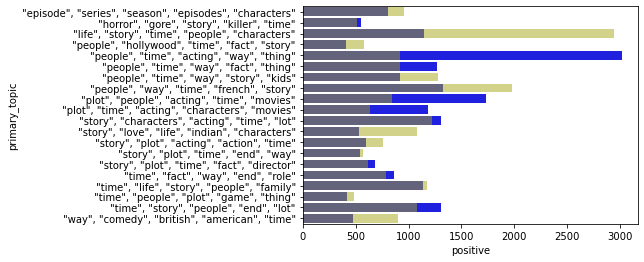

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='negative', y='primary_topic', data=agg, label='Negative', color='b')
sns.barplot(x='positive', y='primary_topic', data=agg, label='Positive', color='y', alpha=0.5)